#### Liner Model Assumptions 

Here are some assumptions about regression model:
**- Linearity**: The mean values of the outcome variable for each increment of the predictor(s) lie along a straight line. In other words, there is a linear relationship between predictors and target.

**- No perfect multicollinearity**: There should be no perfect linear relationship between two or more of the predictors.

**- Normally distributed errors**: the residuals are random, normally distributed with a mean of 0.

**- Homoscedasticity**: At each level of the predictor variable(s), the variance of the residual terms should be constant.

Examples of linear models are:
    - Linear and logistic regression
    - Linear Discriminant Analysis (LDA) 

**Failure to meet one or more of the model assumptions could end up in a poor model performance.** In other words, the variables do not accurately predict the outcome, with a linear model.

**In case of no assumption met, we can:**
- use a different no-linear model to predict the outcome from the variables
- Transform the input variables so that they fulfill the assumptions.

**Determining if linear model is accurate**
The main diagnostic to determine if a linear model works well to predict the outcome from the predictors, is to evaluate in the first place, if the error terms, or residuals follow a normal distribution with a mean of zero, and are homoscedastic. If this is true, we can be fairly confident that the model is doing a good job.

In addition:
- Linear regression can be assessed by scatter-plots and residuals plots
- Multi-colinearity can be assessed by correlation matrices

**If assumption are not found, following transformation can be applied**
Sometimes variable transformation can help the variables meet the model assumptions. We normally do 1 of 2 things:

- Mathematical transformation of the variables
- Discretisation

In this example, we are studying:
- Train a linear model to predict a target from 3 predictor variables
- Evaluate if the model is accurate by examining the residuals
- Determine if the residuals are normally distributed
- If there is homoscedasticity
- We will then transform the data and see how this improves model   performance
- We will then move on to examine Correlation and Linear relationship   between variables and outcome

Dataset: Boston housing  

In [15]:
import pandas as pd 
import numpy as np 

import scipy.stats as stats 

import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error

In [16]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [17]:
# this is the information about the boston house prince dataset
# in case you would like to get familiar with the variables before 
# continuing with the notebook

# the aim is to predict the "Median house value (price)"
# MEDV column of this dataset

# and we have variables with characteristics about
# the homes and the neighborhoods

print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [18]:
# Now, train our model
X_train, X_test, y_train, y_test = train_test_split(
                                            boston[['RM', 'LSTAT', 'CRIM']],
                                            boston['MEDV'], test_size=0.3, random_state=0
                                        )

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (354, 3), Test size: (152, 3)


In [19]:
# let's scale the features
# normal procedure for linear models
# I will explain this later in in the course

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [20]:
linreg = LinearRegression()
# train the model
linreg.fit(scaler.transform(X_train), y_train)

print("Train set")
pred = linreg.predict(scaler.transform(X_train))
print("Linear Regression mse: {}".format(mean_squared_error(y_train, pred)))

print("Test set")
test_pred = linreg.predict(scaler.transform(X_test))
print("Linear Regression mse: {}".format(mean_squared_error(y_test, test_pred)))

Train set
Linear Regression mse: 28.603232128198893
Test set
Linear Regression mse: 33.20006295308441


<AxesSubplot:xlabel='MEDV', ylabel='Count'>

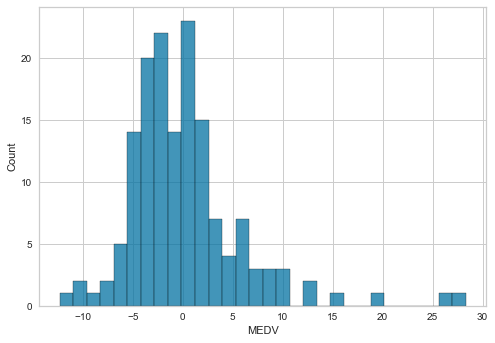

In [21]:
# calculated the test residuals 
error = y_test - test_pred

# lets plot histogram
sns.histplot(error, bins=30)

We see that the residuals show a fairly normal distribution centered at 0. Not perfect, by visual inspection there is some skew towards the left, with a few higher unusual values towards the right of the distribution.

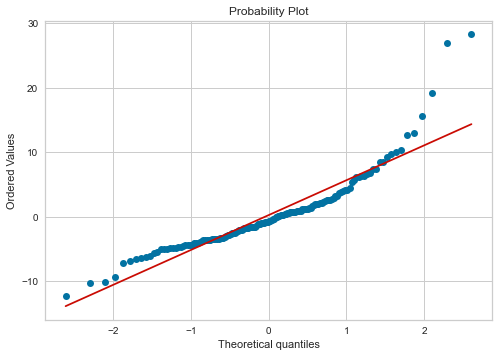

In [22]:
# we can better visualize residuals distribution with 
# a Q-Q plot. If the residuals are normally distributed
# the dots should adjust to the 45 degree line

stats.probplot(error, dist="norm", plot=plt)
plt.show()

From the Q-Q plot we see more easily how the residuals deviate from the red line towards the ends of the distribution, thus, they are not normally distributed.

#### Homoscedasticity

Homoscedasticity implies that at each level of the predictor variable(s), the variance of the residual terms should be constant. So we need to plot the residuals against the variables.

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables X and the dependent variable Y is the same across all the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs each one of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

Residuals plot
Levene’s test
Barlett’s test
Goldfeld-Quandt Test
But those escape the scope of this course. So for this demo I will focus on residual plot analysis.

Text(0, 0.5, 'Residuals')

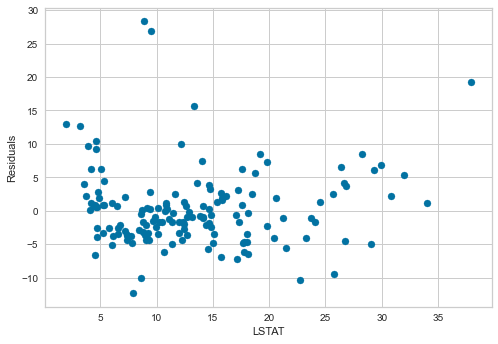

In [23]:
plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuals')

The residuals seem fairly homogeneously distributed across the values of LSTAT.

Text(0, 0.5, 'Residuals')

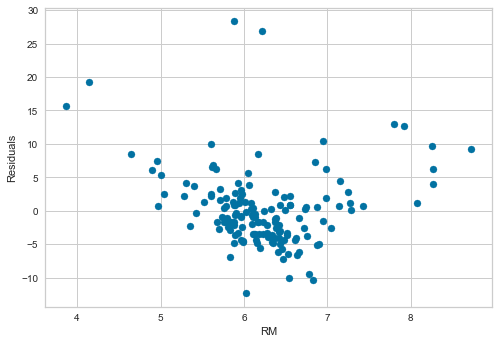

In [24]:
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

For this variable, the residuals do not seem to be homogeneously distributed across the values of RM. In fact, low and high values of RM show higher error terms.

Text(0, 0.5, 'Residuals')

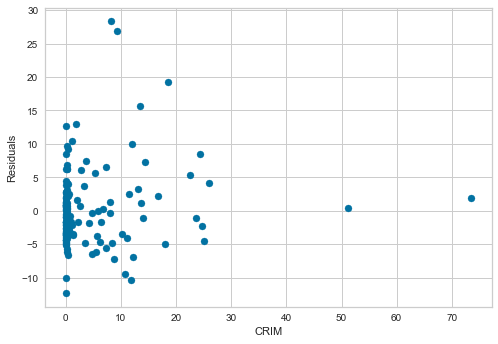

In [25]:
plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuals')

Most values of CRIM are skewed towards the left, so it is hard to say if the residuals show the same variance for all values of CRIM, because we have very few data points for CRIM when its values are high.

#### Automating Residual analysis with Yellowbrick

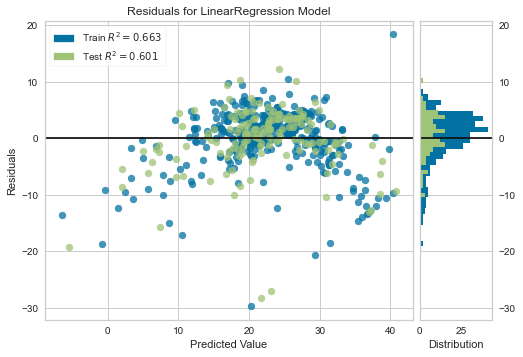

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [26]:
# in this cell, I want to introduce the use of yellobrick
# a library for visualisation of machine learning model 
# performance

# if you don't have yellowbricks installed, comment out
# this cell to avoid errors while running the notebook

# yellowbricks allows you to visualise the residuals of the
# models after fitting a linear regression

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

On the right, we have the distribution of the residuals in the train and test sets. We see that it is not perfectly centered at 0.

On the left, we have the residuals vs the predicted value, we also see that the variance is not constant. Towards the extremes of the predictions, the model is under-estimating the outcome (most residuals are negative). And towards the center of the predictions, the model is over-estimating the outcome. So the residuals variance is not constant for all values.


#### Transform the data to improve model fit

In [27]:
# apply the box-cox transformation to the variables
boston['LSTAT'], _ = stats.boxcox(boston['LSTAT'])
boston['CRIM'], _ = stats.boxcox(boston['CRIM'])
boston['RM'], _ = stats.boxcox(boston['RM'])

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    boston[['RM', 'LSTAT', 'CRIM']],
    boston['MEDV'],
    test_size=0.3,
    random_state=0)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (354, 3), Test size: (152, 3)


In [28]:
# let's scale the features

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [35]:
linreg = LinearRegression()

# fit the model
linreg.fit(scaler.transform(X_train), y_train)

# make predictions and calculate the mean squared
# error over the train set
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
print('Linear Regression mse: {}'.format(mean_squared_error(y_train, pred)))

# make predictions and calculate the mean squared
# error over the test set
print('Test set')
test_pred = linreg.predict(scaler.transform(X_test))
print('Linear Regression mse: {}'.format(mean_squared_error(y_test, test_pred)))

Train set
Linear Regression mse: 25.020138527672213
Test set
Linear Regression mse: 29.70979354458992


In [37]:
# calculate the residuals 
error = y_test - test_pred

#### Residual normality

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

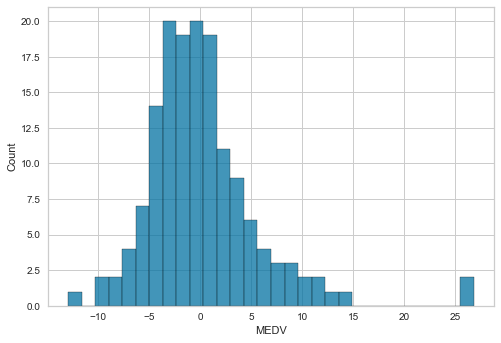

In [38]:
# we will make a histogram to determine if the residuals
# are normally distributed with mean value at 0

sns.histplot(error, bins=30)

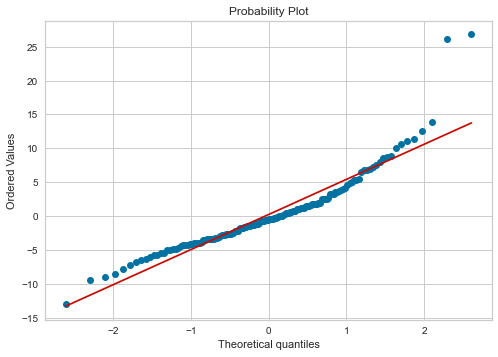

In [39]:
# we can better visualize residuasl distribution with 
# a Q-Q plot. If the residuals are normally distributed
# the dots should adjust to the 45 degree line

stats.probplot(error, dist="norm", plot=plt)
plt.show()

We see an improvement: the residuals are now "more" normally distributed.

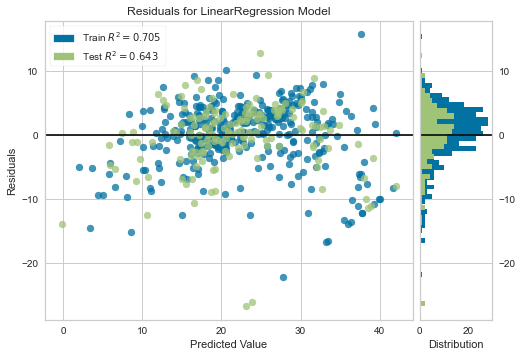

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [40]:
# let's now do the analysis with yellowbrick

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

We can see a noticeable improvement in the distribution of the residuals, now better centered at 0, and with a more even variance across all values of the prediction.


Text(0, 0.5, 'Residuals')

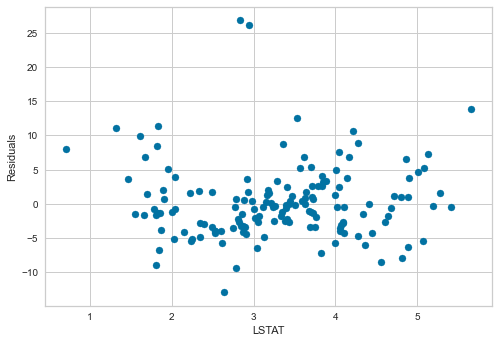

In [41]:
plt.scatter(x=X_test['LSTAT'], y=error)
plt.xlabel('LSTAT')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

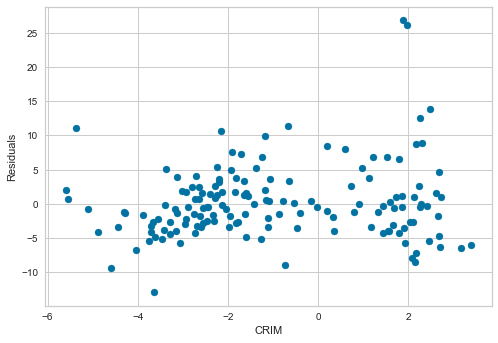

In [42]:
plt.scatter(x=X_test['CRIM'], y=error)
plt.xlabel('CRIM')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

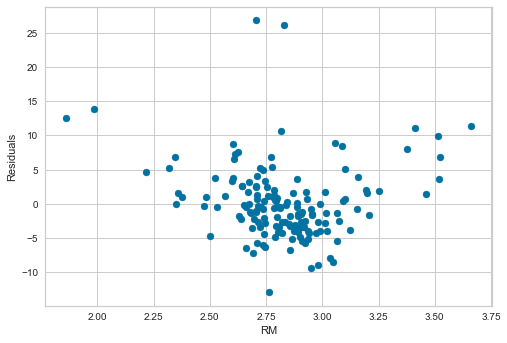

In [43]:
plt.scatter(x=X_test['RM'], y=error)
plt.xlabel('RM')
plt.ylabel('Residuals')

#### Testing Other model assumptions 

Lets Understand the relationship between variables among themselves and outcome. 

In [44]:
np.random.seed(29) # for reproducibility

n = 200
x = np.random.randn(n)
y = x * 10 + np.random.randn(n) * 2

toy_df = pd.DataFrame([x, y]).T
toy_df.columns = ['x', 'y']
toy_df.head()

,x,y
0,-0.417482,-1.271561
1,0.706032,7.990600
2,1.915985,19.848687
3,-2.141755,-21.928903
4,0.719057,5.579070


##### Linear relationship
We evaluate linear assumption with scatter plots and residual plots. Scatter plots plot the change in the dependent variable y with the independent variable x.

Text(0.5, 8.959999999999994, 'Independent variable')

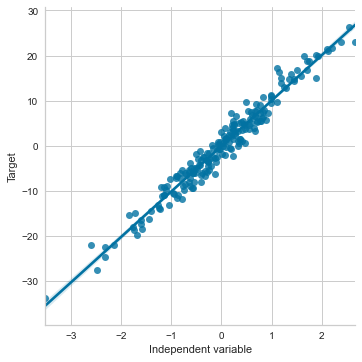

In [45]:
sns.lmplot(x="x", y="y", data=toy_df, order=1)
# order 1 indicates that we want seaborn to
# estimate a linear model (the line in the plot below)
# between x and y

plt.ylabel('Target')
plt.xlabel('Independent variable')

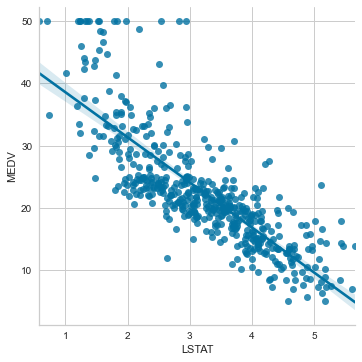

In [46]:
# now we make a scatter plot for the boston
# house price dataset

# (remember that we transformed the variables already)

# we plot LAST (% lower status of the population)
# vs MEDV (median value of the house)

sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

The relationship between LSTAT and MEDV is fairly linear apart from a few values around the minimal values of LSTAT, towards the top left side of the plot.

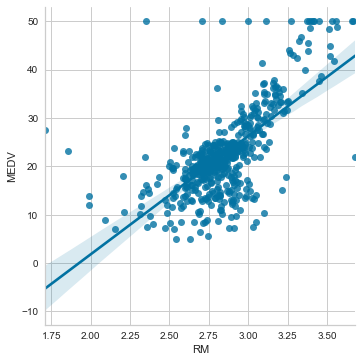

In [48]:
# now we plot RM (average number of rooms per dwelling)
# vs MEDV (median value of the house)

sns.lmplot(x="RM", y="MEDV", data=boston, order=1)

The relationship between the target and transformed RM is not very linear. We could consider, transforming this variable further, removing the variable from the model, or using a non-linear model to predict MEDV from RM.

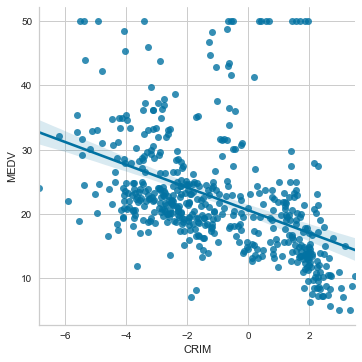

In [49]:
# now we plot CRIM (per capita crime rate by town)
# vs MEDV (median value of the house)

sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

#### Multicolinearity
To determine co-linearity, we evaluate the correlation of all the independent variables in the dataframe.

<AxesSubplot:>

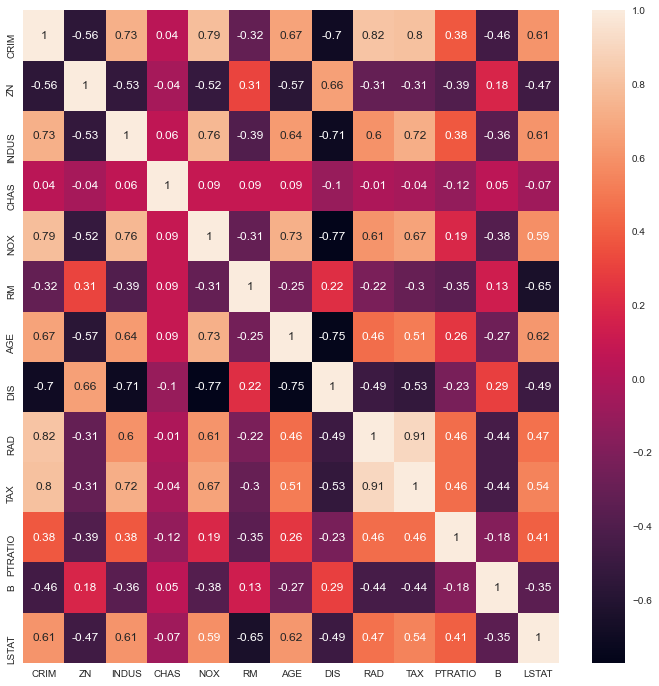

In [50]:
features = boston_dataset.feature_names

# we calculate the correlations using pandas corr
# and we round the values to 2 decimals
correlation_matrix = boston[features].corr().round(2)

# plot the correlation matrix usng seaborn
# annot = True to print the correlation values
# inside the squares

figure = plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True)

On the x and y axis of the heatmap we have the variables of the boston house dataframe. Within each square, the correlation value between those 2 variables is indicated. For example, for LSTAT vs CRIM at the bottom left of the heatmap, we see a correlation of 0.61.

Instead, for the variables RAD and TAX (try and find them in the plot), the correlation is 0.91. These variables are highly correlated. The same is true for the variables NOX and DIS, which show a correlation value of -0.71.

Let's see how they look in a scatter plot.

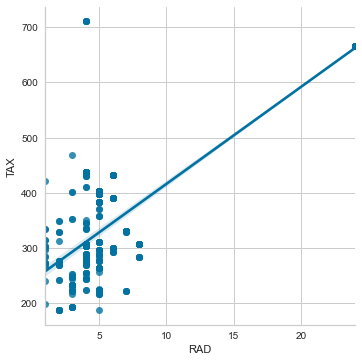

In [51]:
# correlation between RAD (index of accessibility to radial highways)
# and TAX (full-value property-tax rate per $10,000)

sns.lmplot(x="RAD", y="TAX", data=boston, order=1)


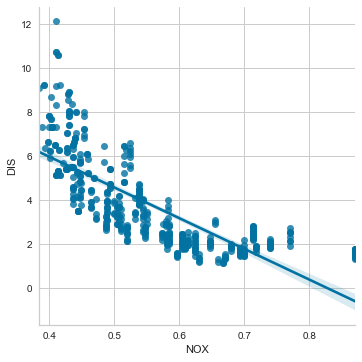

In [52]:
#  now NOX (itric oxides concentration (parts per 10 million))
# DIS (weighted distances to five Boston employment centres)

sns.lmplot(x="NOX", y="DIS", data=boston, order=1)

The correlation, or co-linearity between NOX and DIS, is quite obvious in the above scatter plot. So these variables are violating the assumption of no multi co-linearity.

What we would do is remove 1 of the 2 from the dataset before training the linear model.